This notebook tests the ability of [ESOL](https://pubs.acs.org/doi/10.1021/ci034243x) to predict the solubility data released with the recent paper by [Fang et al](https://pubs.acs.org/doi/10.1021/acs.jcim.3c00160) from Biogen.

In [2]:
import pandas as pd
from rdkit import Chem
from esol import ESOLCalculator
from plot_regression import plot_regression

Read the data

In [3]:
df = pd.read_csv("biogen_solubility.csv")

Add a molecule column to the dataframe

In [4]:
df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)

Instantiate an ESOLCalaculator.

In [5]:
esol_calc = ESOLCalculator()

Calculate ESOL

In [6]:
df['esol'] = df.mol.apply(esol_calc.calc_esol)

Plot the results

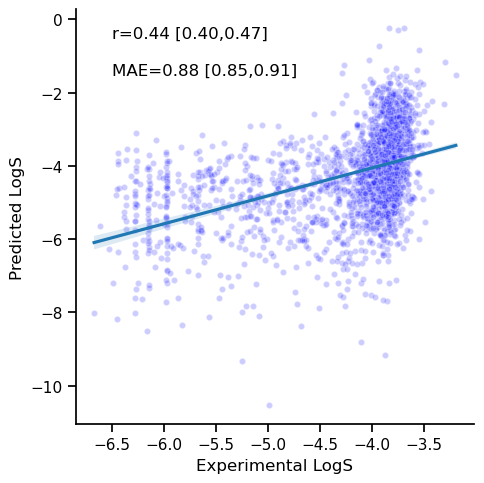

In [7]:
plot_regression(df.logS,df.esol)

In [9]:
df['ESOL_residuals'] = df.logS - df.esol

In [10]:
df[['Internal ID','Vendor ID','SMILES','ESOL_residuals']].to_csv("ESOL_residuals.csv",index=False)